<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/tf_01_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, selon les T.P de [Bruno DESPRES](https://www.ljll.math.upmc.fr/despres/)

> https://www.ljll.math.upmc.fr/~despres/BD_fichiers/mnist_CNN_TReLU.py

In [2]:
from matplotlib import pyplot

import numpy

from tensorflow import keras
from keras import layers
from keras import backend as K

# Introduction

On se propose de travailler sur le jeu de données MNIST. Cet ensemble représente un certain nombre d'images de chiffres manuscrits, ces images sont représentées en noir et blanc. Plus d'informations sont disponibles à cette adresse

> http://yann.lecun.com/exdb/mnist/

# Chargement et pré-traitement des données

Ici, le problème est de **classifier** chaque image en lui associant le chiffre qu'elle représente. 

In [3]:
num_classes = 10                                                    # nombre de classes : {0, 1, 2, ... , 9}
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']    # nom des classes

input_shape = (28, 28, 1)    # une observation est une image 28 x 28 dont chaque pixel est un entier : {0, 1, ...., 255}

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()    # import des datasets d'entraînement et de test
                                                                           # déjà séparés, sinon c.f sklearn train_test_split etc.

x_train = x_train.astype("float32") / 255    # mise à l'échelle et dans le bon format des attributs des observations
x_test  = x_test.astype("float32") / 255     # un pixel est un réel compris dans [0, 1]

x_train = numpy.expand_dims(x_train,-1)    # vérification des dimensions du jeu d'entraînement
x_test  = numpy.expand_dims(x_test, -1)    #      "                "         "  de test
print(f"> dimensions du jeu d'entraînement : {x_train.shape}, dont un élément est de taille {x_train[0].shape}")
print(f"> dimensions du jeu de test : {x_test.shape}")

y_train = keras.utils.to_categorical(y_train, num_classes)    # conversion de la classe en vecteur d'indicatrices par classe (y est maintenant 2D)
y_test  = keras.utils.to_categorical(y_test,  num_classes)    # conversion de la classe en vecteur d'indicatrices par classe (y est maintenant 2D)
                                                              # y_train[i, j] == 1 si y_train[i] == "j", 0 sinon
                                                              # c.f sklearn OneHotEncoder

> dimensions du jeu d'entraînement : (60000, 28, 28, 1), dont un élément est de taille (28, 28, 1)
> dimensions du jeu de test : (10000, 28, 28, 1)


# Aperçu des 25 premières images

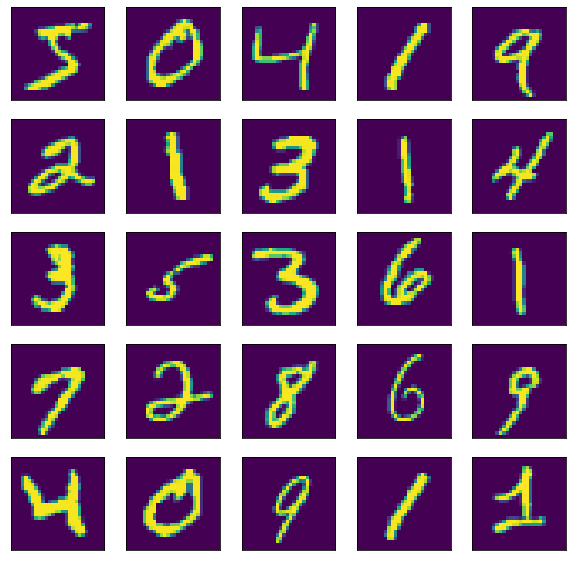

In [4]:
pyplot.figure(figsize=(10,10))
for i in range(25):
    pyplot.subplot(5 , 5, i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(x_train[i][:, :, 0])
pyplot.show()

# Construction du modèle

In [5]:
def T_relu(x):
    "Variation sur la fonction REctified Linear Unit."
    return K.relu(x, max_value=1)

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
     
        layers.Conv2D(32, kernel_size=(3, 3), activation=T_relu),
        
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation=T_relu),
        
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Entraînement du modèle sur 15 fois 128 observations

In [7]:
epochs     =  15    # nombre de runs
batch_size = 128    # nombre d'observations par run

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])    # compilation du graphe

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)    # entraînement

Epoch 1/15
422/422 [==============================] - 56s 128ms/step - loss: 0.2954 - accuracy: 0.9223 - val_loss: 0.0815 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 52s 124ms/step - loss: 0.0773 - accuracy: 0.9774 - val_loss: 0.0557 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 52s 123ms/step - loss: 0.0558 - accuracy: 0.9840 - val_loss: 0.0450 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 52s 123ms/step - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 52s 122ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.0379 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 51s 122ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 7/15
422/422 [==============================] - 52s 123ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0381 - val_ac

# Evaluation du modèle

On se contente de la prédiction sur l'ensemble de test, c.f les notebooks sur Scikit-learn pour plus d'outils de validation.

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02869286574423313
Test accuracy: 0.9909999966621399
